<a href="https://colab.research.google.com/github/VictorGabrielCuralesvic/email-antispam-project/blob/main/email_spam_detector_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from nltk.stem.porter import PorterStemmer

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2615,ham,2marrow only. Wed at &lt;#&gt; to 2 aha.,NaN,NaN,NaN
4223,ham,Double eviction this week - Spiral and Michael...,NaN,NaN,NaN
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
2049,ham,How much is blackberry bold2 in nigeria.,NaN,NaN,NaN
583,ham,my ex-wife was not able to have kids. Do you w...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4643,ham,Did u got that persons story
5025,spam,Ur cash-balance is currently 500 pounds - to m...
4216,ham,Will be office around 4 pm. Now i am going hos...
1928,spam,Call from 08702490080 - tells u 2 call 0906635...
1348,ham,"Nothing much, chillin at home. Any super bowl ..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
5524,spam,You are awarded a SiPix Digital Camera! call 0...
2546,ham,Company is very good.environment is terrific a...
1747,ham,I think u have the wrong number.
3659,ham,I will reach ur home in &lt;#&gt; minutes
1653,ham,I was at bugis juz now wat... But now i'm walk...


In [11]:
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7e78b0e10d30>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

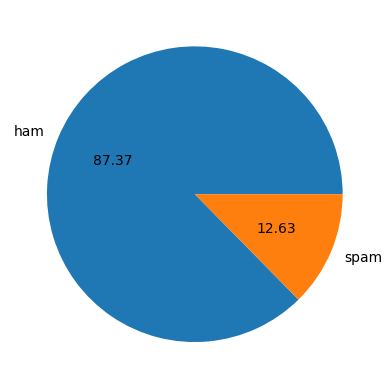

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")

In [21]:
!pip install imbalanced-learn

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [23]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df[['text']], df['target'])

In [24]:
df_resampled = pd.DataFrame({'text': X_resampled['text'], 'target': y_resampled})

0    4516
1    4516
Name: target, dtype: int64


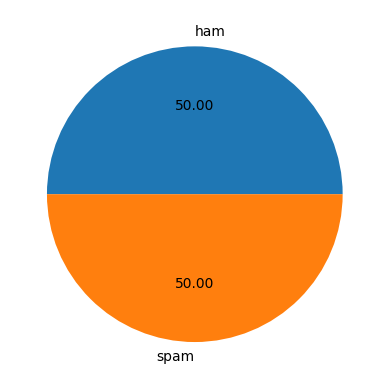

In [25]:
print(df_resampled['target'].value_counts())
plt.pie(df_resampled['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [32]:
import nltk

In [33]:
!pip install nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-37-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

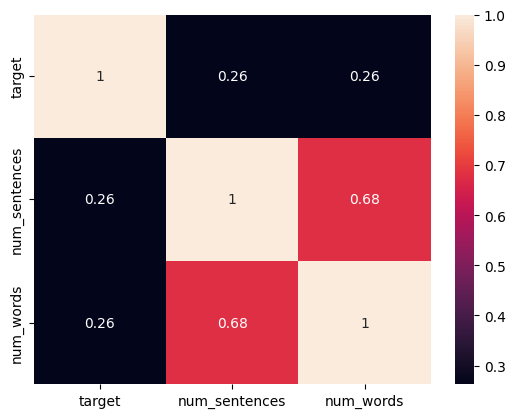

In [37]:
sns.heatmap(df.corr(),annot=True)

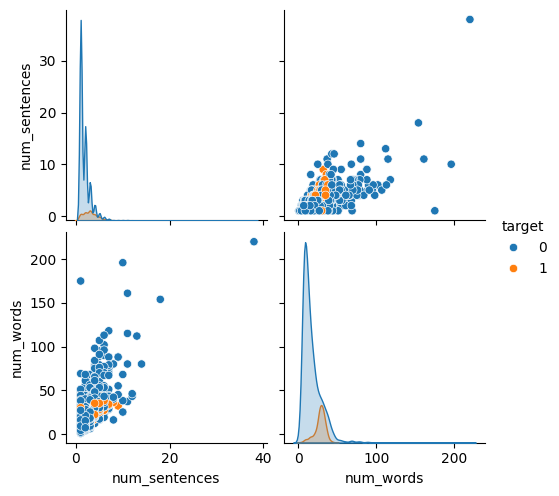

In [38]:
sns.pairplot(df,hue='target')

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

In [40]:
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [41]:
X = df['text']
y = df['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [44]:
X_test_tfidf = vectorizer.transform(X_test)

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [46]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [47]:
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [48]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [49]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'\nConfusion Matrix: {confusion_matrix(y_test, y_pred)}')
print(f'\nPrecision: {precision_score(y_test, y_pred)}')

Accuracy: 0.9845261121856866

Confusion Matrix: [[892   4]
 [ 12 126]]

Precision: 0.9692307692307692


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision_tree = DecisionTreeClassifier(max_depth=5)

In [53]:
decision_tree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=5)

In [54]:
y_pred2 = decision_tree.predict(X_test_tfidf)

In [55]:
print(f'Accuracy: {accuracy_score(y_test, y_pred2)}')
print(f'\nConfusion Matrix: {confusion_matrix(y_test, y_pred2)}')
print(f'\nPrecision: {precision_score(y_test, y_pred2)}')

Accuracy: 0.9410058027079303

Confusion Matrix: [[880  16]
 [ 45  93]]

Precision: 0.8532110091743119


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
neighbors_c = KNeighborsClassifier()

In [60]:
neighbors_c.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [61]:
y_pred3 = neighbors_c.predict(X_test_tfidf)

In [62]:
accuracy = accuracy_score(y_test, y_pred3)

In [63]:
precision = precision_score(y_test, y_pred3)

In [64]:
print(f'Accuracy: {accuracy_score(y_test, y_pred3)}')
print(f'\nConfusion Matrix: {confusion_matrix(y_test, y_pred3)}')
print(f'\nPrecision: {precision_score(y_test, y_pred3)}')

Accuracy: 0.9129593810444874

Confusion Matrix: [[896   0]
 [ 90  48]]

Precision: 1.0
